In [1]:
# Import our libraires 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style('whitegrid')
sns.set_theme(style="darkgrid")

In [2]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# check our current directory 
%pwd

'C:\\Users\\TOSHIBA\\Desktop\\Build a Logistic Regression Model in Python from Scratch'

In [4]:
# Import our data and make orgin file
data = pd.read_csv('Data\data_regression.csv')
orgin_data = data.copy()

# show the first 10 rows of our data and the shape of it
print(data.head(),'\n')
print('Data shape is ', data.shape)

   year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   


In [5]:
# function help us to understand our data
# understanding our data by small steps and visual tools
def understand_our_data(data):
    print('Our Data Info','\n')
    print(data.info(),'\n')
    print('Describe our Numeric data','\n')
    print(data.describe(),'\n')
    print('Describe our Objectiv data','\n')
    print(data.describe(include=['O']),'\n')
    print('Objects columns','\n')
    print(data.dtypes.sort_values(),'\n')
    print('Number of unique vales','\n')
    print(data.nunique().sort_values(),'\n')
    print('percantge of null values', '\n')
    print(round(data.isna().sum(axis=0)/len(data),4)*100)

print(understand_our_data(data))

Our Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  

In [6]:
# first of all we have four objects columns three of them yes or no anwser we have to change it to 0 or 1
# and the last one is the phone number of our customers it is not imporant we have to delet it
# churn, maximum_days_inactive,and gender has missing values less than 2%
objects_colums = ['multi_screen', 'mail_subscribed']
for col in objects_colums:
    data[col] = data[col].replace(['yes','no'], [1,0])

In [7]:
gender = {'Female': 0,'Male': 1}
data['gender'] = data['gender'].replace(gender)

In [8]:
# drop not related column
data.drop(['customer_id','phone_no'], axis=1, inplace = True)

In [9]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   gender                  1976 non-null   float64
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   2000 non-null   int64  
 4   multi_screen            2000 non-null   int64  
 5   mail_subscribed         2000 non-null   int64  
 6   weekly_mins_watched     2000 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          2000 non-null   int64  
 11  maximum_days_inactive   1972 non-null   float64
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 21

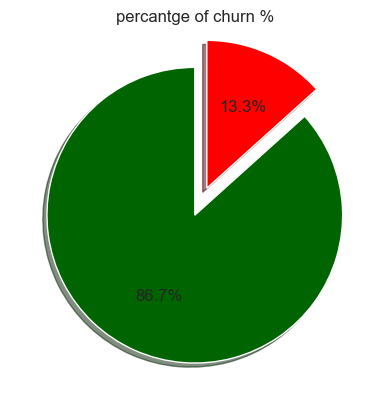

In [10]:
#Pie for our target
topie = data['churn'].value_counts(sort =True)
colors = ['darkgreen', 'red']
plt.pie(topie, colors = colors, explode = [0,0.2], autopct='%1.1f%%',
        shadow =True, startangle=90)
plt.title('percantge of churn %')
plt.show()# Pie figure 

In [11]:
# Extract our columns in list
columns = data.columns
print('list of our data columns:', '\n',columns)

list of our data columns: 
 Index(['year', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')


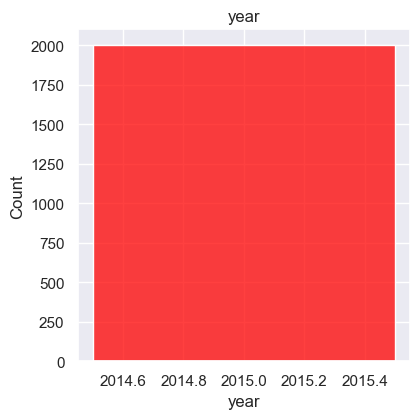

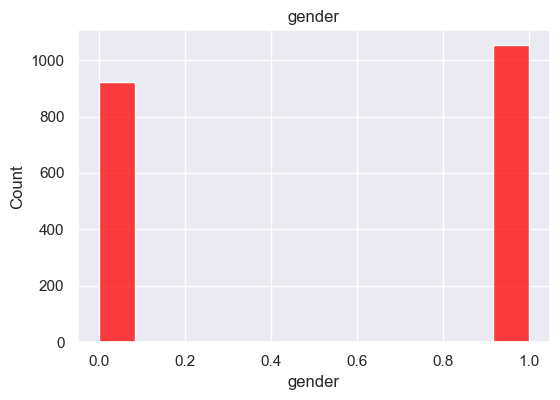

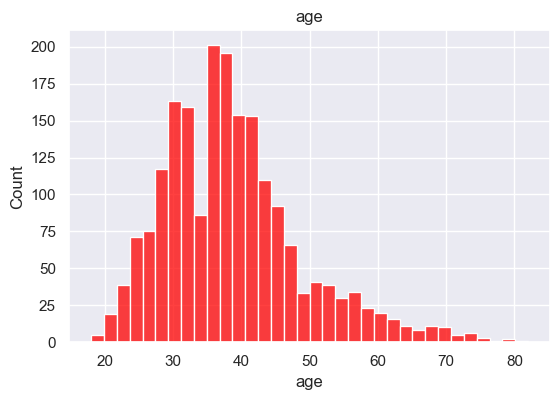

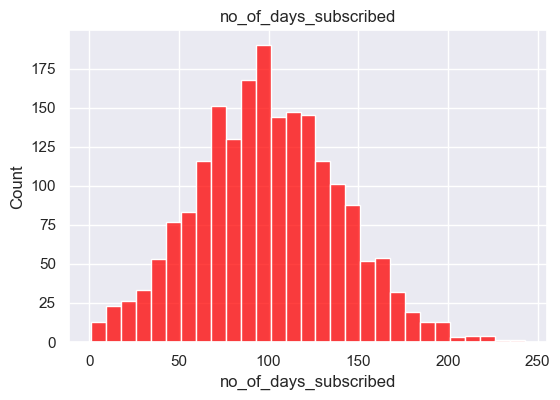

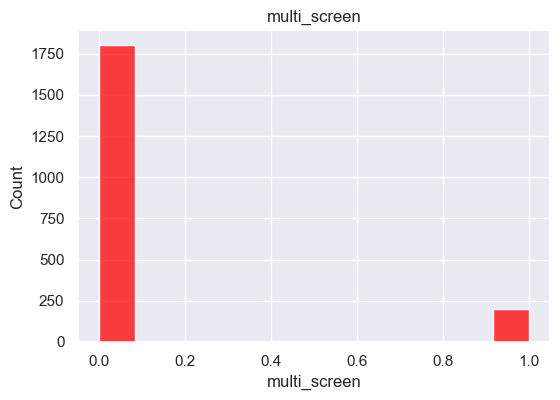

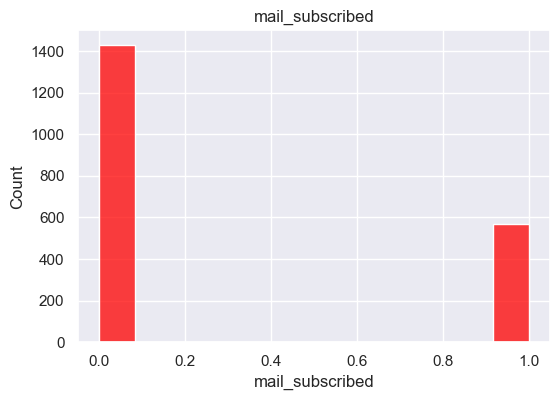

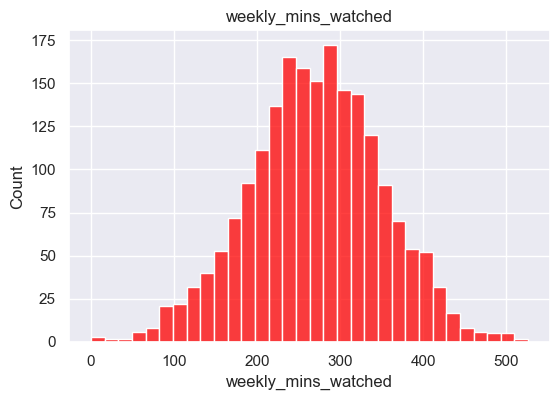

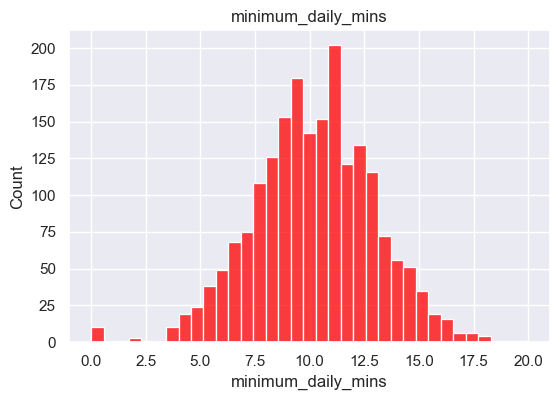

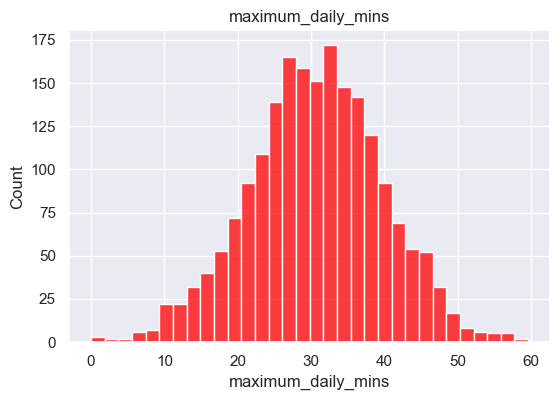

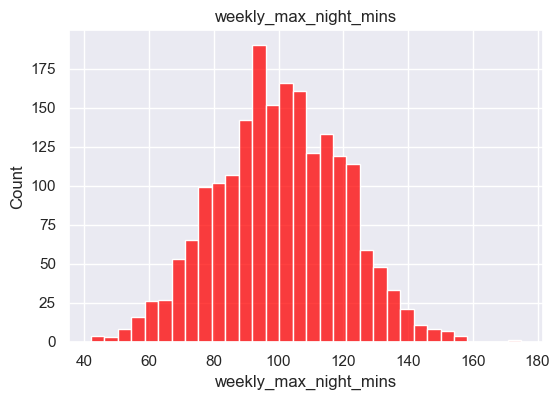

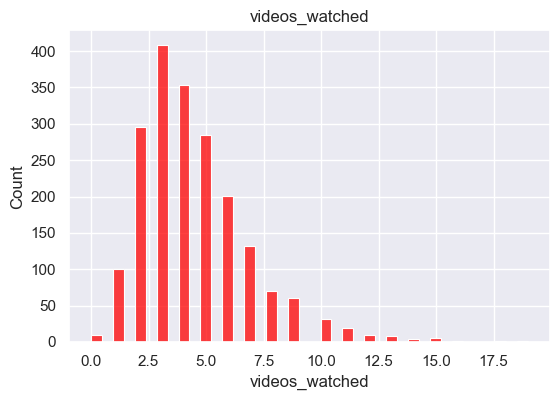

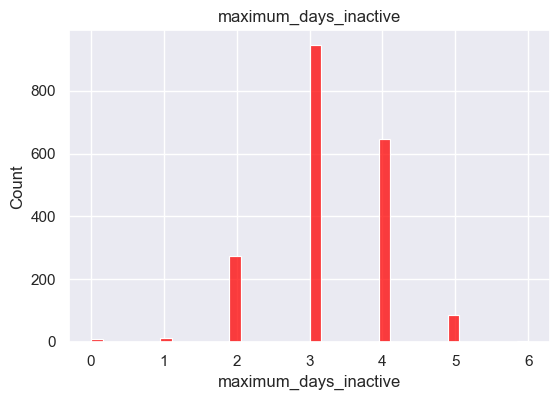

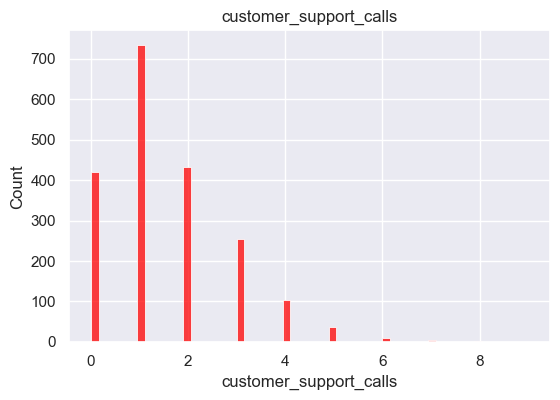

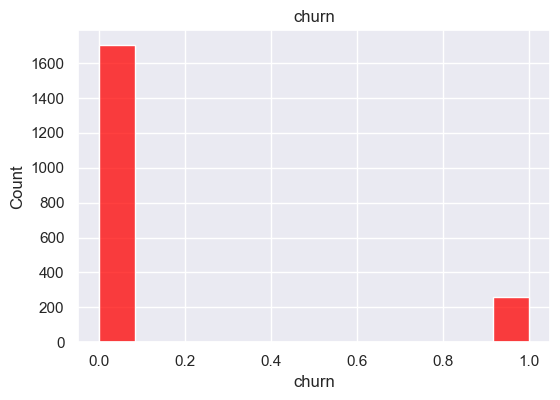

In [12]:
# figure for diferent variables comparing with target
fig = plt.subplots(figsize=(5,5))
def graph(x,title): 
    sns.histplot(data[x],color='red')
    plt.title(title)
    plt.tight_layout(pad=3.0)
    plt.show()

for col in data.columns:
    graph(x=col, title=col)

In [13]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
  cols_to_eval.append(class_col) 
  X = df[cols_to_eval] # only selective columns
  sns.pairplot(X,hue = class_col)# plot
  plt.show()

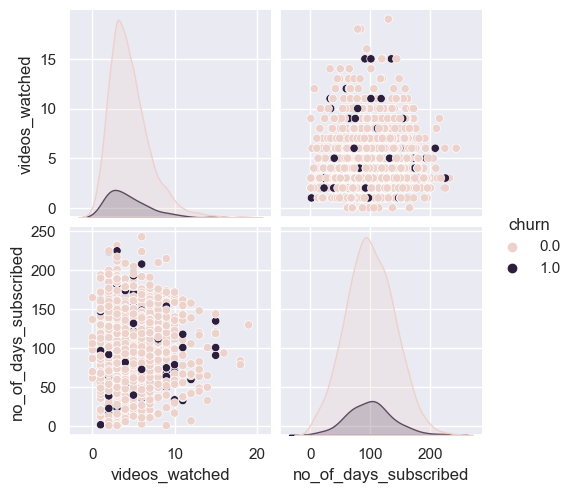

In [14]:
selected_diagnotic(data,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

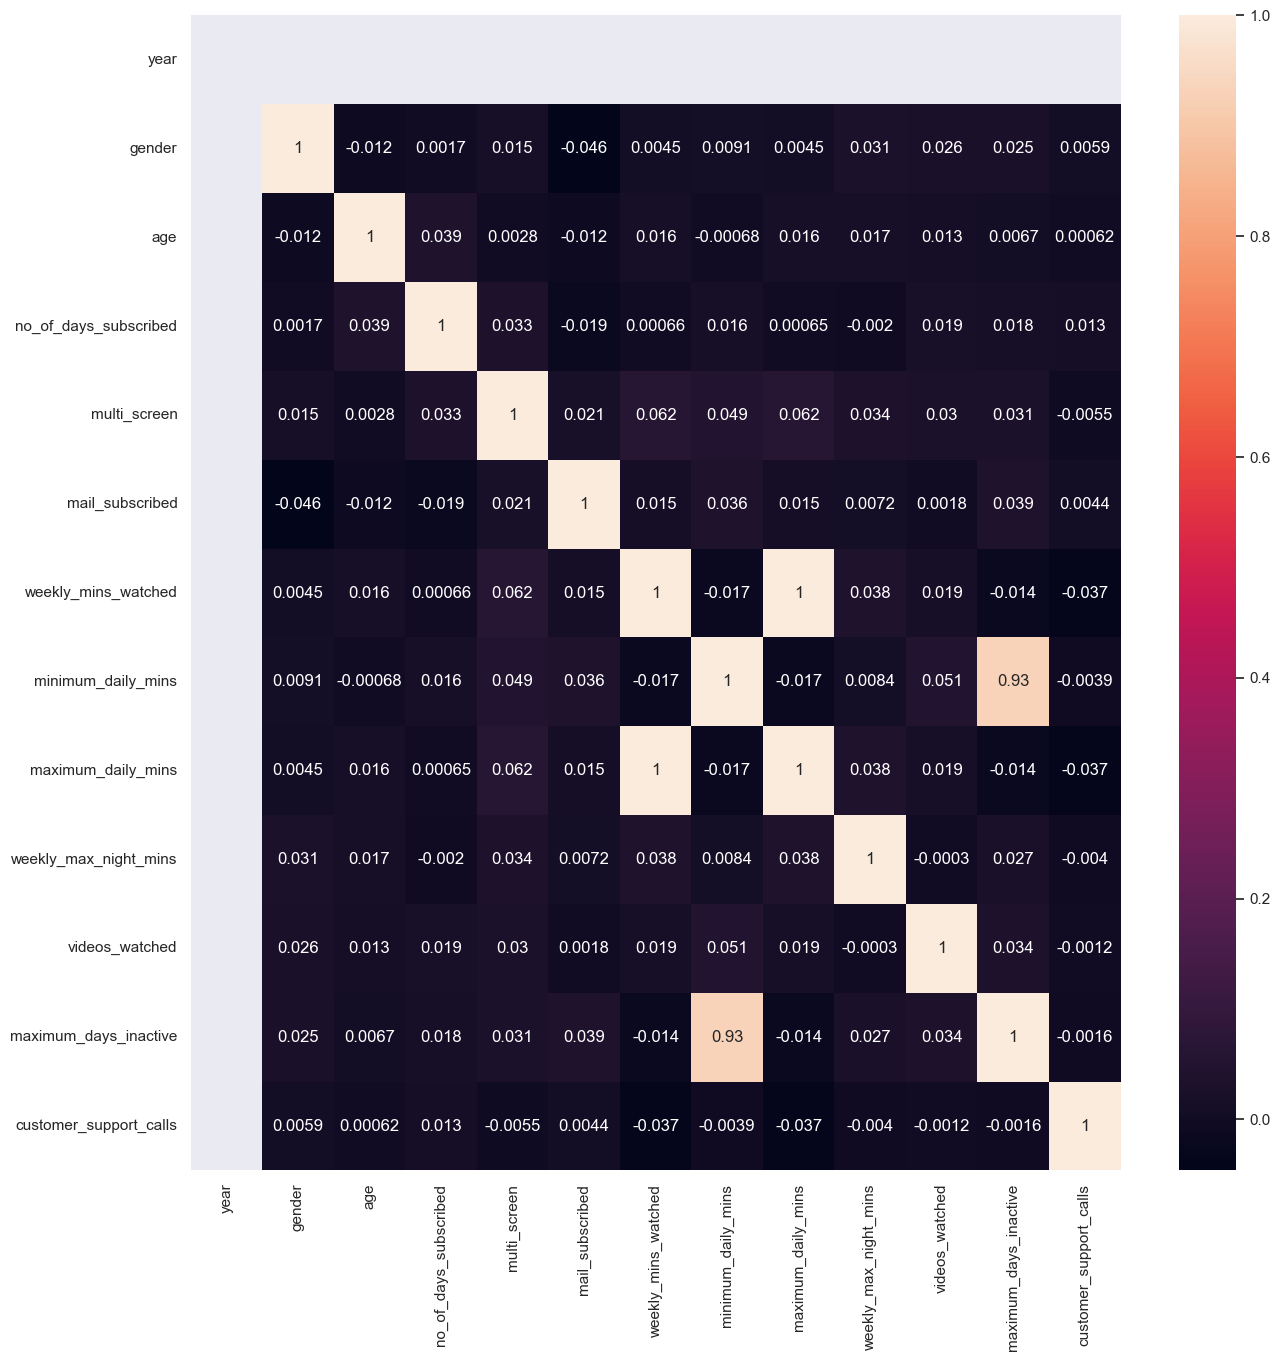

In [15]:
# let's study the corrleation 
x = data.drop('churn', axis = 1)
fig = plt.subplots(figsize=(15,15))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [16]:
# check the relation between maximum_daily_mins and weekly_mins_watched 
# we can notice they are almost the same effect on the target becuase they are almost increase with the same rate
corr_1 = data[['maximum_daily_mins', 'weekly_mins_watched']].sort_values(by=['maximum_daily_mins'])
print(corr_1.head())
print(corr_1['weekly_mins_watched'] /corr_1['maximum_daily_mins'])
# we have to drop one of them
data.drop('maximum_daily_mins', axis=1, inplace=True)

      maximum_daily_mins  weekly_mins_watched
785                 0.00                 0.00
1411                0.00                 0.00
1614                1.34                11.85
1077                2.13                18.75
300                 3.32                29.25
785          NaN
1411         NaN
1614    8.843284
1077    8.802817
300     8.810241
304     8.829545
937     8.828571
1256    8.823529
569     8.819095
1476    8.818040
1542    8.816964
67      8.827338
454     8.827247
1990    8.823529
1137    8.817952
629     8.821340
19      8.821385
1904    8.826531
1353    8.827508
1191    8.827362
1365    8.819742
1443    8.824468
1719    8.820803
1594    8.819018
2       8.827098
1221    8.821752
1106    8.820000
1071    8.826174
1301    8.819170
951     8.823529
1748    8.821811
198     8.826923
896     8.825215
193     8.826046
539     8.824363
331     8.821866
1052    8.825188
98      8.820225
124     8.826006
552     8.826816
159     8.825137
1217    8.821942
442     8.

In [17]:
# check the relation between minimum_daily_mins and maximum_days_inactive 
# the rate almost near
corr_2 = data[['minimum_daily_mins', 'maximum_days_inactive']].sort_values(by=['minimum_daily_mins'])
print(corr_2.head())
print(corr_2['minimum_daily_mins'] /corr_2['maximum_days_inactive'])
# we have to drop one of them
data.drop('minimum_daily_mins', axis=1, inplace=True)

      minimum_daily_mins  maximum_days_inactive
452                  0.0                    0.0
1555                 0.0                    0.0
849                  0.0                    0.0
337                  0.0                    0.0
766                  0.0                    0.0
452          NaN
1555         NaN
849          NaN
337          NaN
766          NaN
317          NaN
419          NaN
423          NaN
271          NaN
159          NaN
135     1.300000
932     2.000000
1198    2.000000
595     2.200000
1535    2.700000
1818    3.500000
723     3.500000
931     3.500000
1626    3.600000
1826    3.600000
1470    3.700000
764     3.700000
750     1.900000
589     1.900000
126     1.950000
1118    2.000000
1674    2.000000
871     2.050000
259     2.050000
1081    2.050000
90      2.100000
1453    2.100000
1953    2.100000
1009    2.100000
1928    2.200000
599     2.200000
587     2.200000
389     2.200000
460     2.200000
898     2.250000
1621    2.250000
880     2.25000

In [18]:
# dealing with missing values
# they are not too much and they will not effect our data so I will drop them
data.dropna(axis = 0, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1918 non-null   int64  
 1   gender                  1918 non-null   float64
 2   age                     1918 non-null   int64  
 3   no_of_days_subscribed   1918 non-null   int64  
 4   multi_screen            1918 non-null   int64  
 5   mail_subscribed         1918 non-null   int64  
 6   weekly_mins_watched     1918 non-null   float64
 7   weekly_max_night_mins   1918 non-null   int64  
 8   videos_watched          1918 non-null   int64  
 9   maximum_days_inactive   1918 non-null   float64
 10  customer_support_calls  1918 non-null   int64  
 11  churn                   1918 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 194.8 KB
None


In [19]:
# drop year because it is the same for all rows
data.drop('year', axis=1, inplace=True)

In [20]:
X = data.drop('churn', axis=1)
y = data['churn']
print(X.shape, y.shape)

(1918, 10) (1918,)


In [21]:
# algorthims we are using to predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [22]:
# metrics we are using it 
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score, precision_recall_curve
from sklearn.metrics import average_precision_score, roc_curve,precision_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [24]:
#Logistic Regression 
lr = LogisticRegression(random_state=42, solver='liblinear')
params = {'penalty': ['l1','l2'], 'C': [0.1,1,2,3,5]}
cv_lr = GridSearchCV(estimator=lr, param_grid = params, cv=5)
cv_lr.fit(X_train, y_train)
lr_best = cv_lr.best_estimator_
print(lr_best)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')


In [25]:
# predict our results 
test_score_lr = lr_best.predict_proba(X_test)[:,1]
print(test_score_lr)
print(pd.Series(test_score_lr).describe())

[0.17884145 0.10527363 0.04758134 0.07152679 0.09690683 0.04209152
 0.16363615 0.1556563  0.22537911 0.15142212 0.062424   0.1543529
 0.06415728 0.10933767 0.21693231 0.08784405 0.06724144 0.41449079
 0.11900581 0.0770876  0.06927141 0.09348732 0.05959501 0.02641552
 0.08632675 0.30326358 0.0951901  0.18492941 0.11018302 0.06753838
 0.10204404 0.27451642 0.08290837 0.09750622 0.15256936 0.03363521
 0.15925193 0.14515964 0.12008302 0.06468188 0.02609717 0.36656972
 0.06529674 0.13616965 0.12400698 0.08635999 0.31756398 0.04312741
 0.01985949 0.11686569 0.16031214 0.0833015  0.05165358 0.07327148
 0.08923395 0.18141806 0.20202355 0.18481228 0.18165028 0.30860047
 0.14266121 0.08655366 0.06825386 0.03719549 0.03915426 0.06085661
 0.03809664 0.03536381 0.11232427 0.07178266 0.15503487 0.05375406
 0.04654547 0.08829013 0.03766668 0.17264032 0.05999479 0.03199893
 0.55513692 0.11047846 0.09277324 0.13143651 0.06236117 0.13712879
 0.07029052 0.06351635 0.24665358 0.06568056 0.44531397 0.15202

In [26]:
# Gradient boosting classifier 
gbr = GradientBoostingClassifier(random_state=42)
params_gbr = {'n_estimators': [50,100,500], 'max_features': ['auto'],
          'learning_rate':[0.01,0.05,0.1,0.2]}
cv_gbr = GridSearchCV(estimator=gbr, param_grid = params_gbr, cv=5)
cv_gbr.fit(X_train, y_train)
gbr_best = cv_gbr.best_estimator_
print(gbr_best)

GradientBoostingClassifier(learning_rate=0.01, max_features='auto',
                           n_estimators=500, random_state=42)


In [27]:
#predict our results 
test_score_gbr = gbr_best.predict_proba(X_test)[:,1]
pd.Series(test_score_gbr).describe()

count    633.000000
mean       0.126971
std        0.202786
min        0.022786
25%        0.029523
50%        0.033817
75%        0.096739
max        0.914636
dtype: float64

In [28]:
#  roc auc score test
ROC_lr = roc_auc_score(y_test, lr_best.predict(X_test))
ROC_gbr = roc_auc_score(y_test, gbr_best.predict(X_test))
print(ROC_gbr)
print(ROC_lr)

0.7301454019812081
0.5312274138004336


In [29]:
#  roc auc score test
ROC_lr = roc_auc_score(y_test, test_score_lr)
ROC_gbr = roc_auc_score(y_test, test_score_gbr)
print(ROC_gbr)
print(ROC_lr)

0.8561604523617194
0.7268611028442669


In [30]:
from sklearn.metrics import roc_auc_score,classification_report
print(classification_report(y_test, lr_best.predict(X_test))) # check for classification report 
print(classification_report(y_test, gbr_best.predict(X_test))) # check for classification report 

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       547
         1.0       0.60      0.07      0.12        86

    accuracy                           0.87       633
   macro avg       0.74      0.53      0.53       633
weighted avg       0.83      0.87      0.82       633

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       547
         1.0       0.82      0.48      0.60        86

    accuracy                           0.91       633
   macro avg       0.87      0.73      0.78       633
weighted avg       0.91      0.91      0.90       633



In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X) 
result=logit_model.fit() # fit the model 
print(result.summary2()) # check for summary 

Optimization terminated successfully.
         Current function value: 0.338731
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.131     
Dependent Variable:    churn             AIC:               1319.3705 
Date:                  2022-04-03 14:12  BIC:               1374.9609 
No. Observations:      1918              Log-Likelihood:    -649.69   
Df Model:              9                 LL-Null:           -748.02   
Df Residuals:          1908              LLR p-value:       1.6582e-37
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
gender                 -0.2213   0.1441 -1.5356 0.1246 -0.5037  0.0612
age

# Run the ML modle 

In [32]:
def run_model(X_train,X_test,y_train,y_test):
    global logreg
    logreg = LogisticRegression(random_state = 13)
    logreg.fit(X_train,y_train)
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = logreg.predict(X_test)
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)

In [33]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       547
         1.0       0.55      0.13      0.21        86

    accuracy                           0.87       633
   macro avg       0.71      0.56      0.57       633
weighted avg       0.83      0.87      0.83       633

The area under the curve is: 0.56


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test,y_pred) # confusion matrix 
    print(confusion_matrix)
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'% tn)
    print('TP: %0.2f'% tp)
    print('FP: %0.2f'%fp)
    print('FN: %0.2f'%fn)    

In [40]:
def roc_curve(logreg, X_test, y_test):
    
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test,logreg.predict(X_test)) # ROC AUC Score
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC Curve
    plt.figure()
    plt.xlim([0.0,1.0]) #Setting the graph area
    plt.ylim([0.0,1.05]) #Setting the graph area
    plt.plot([0,1],[0,1],'b--') #Plotting the worst line possiple
    
    #Plotting the logistic regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    
    #adding labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    

In [41]:
confusion_matrix(y_test,y_pred)

[[538   9]
 [ 75  11]]
TN: 538.00
TP: 11.00
FP: 9.00
FN: 75.00


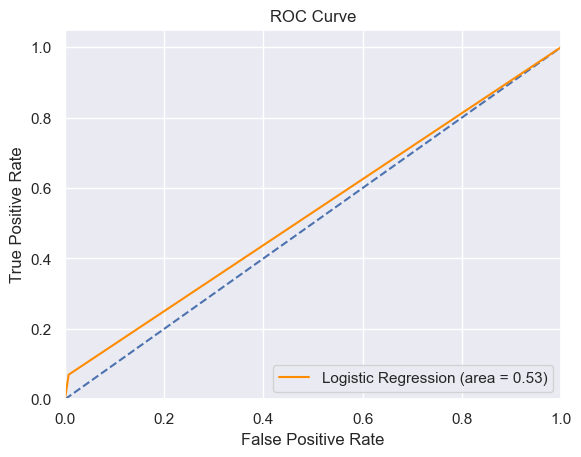

In [42]:
roc_curve(lr_best,X_test,y_test)

In [43]:
y_pred.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [46]:
y_test

1015    0.0
1538    0.0
663     0.0
549     0.0
1388    0.0
1631    0.0
1181    0.0
512     0.0
1334    0.0
731     0.0
1961    0.0
1051    0.0
1620    0.0
1326    0.0
606     0.0
1309    1.0
969     0.0
113     1.0
137     1.0
1945    0.0
944     0.0
1814    0.0
1238    0.0
421     0.0
387     0.0
441     1.0
611     0.0
1108    0.0
1299    0.0
1457    0.0
1935    0.0
597     0.0
1714    0.0
668     0.0
79      0.0
1543    1.0
819     0.0
630     0.0
295     0.0
1267    0.0
913     0.0
1828    0.0
478     0.0
1761    0.0
638     0.0
842     0.0
1240    1.0
671     0.0
1689    0.0
1335    0.0
1926    1.0
281     0.0
929     0.0
781     0.0
1651    0.0
637     0.0
1690    1.0
1203    0.0
1064    0.0
145     0.0
1982    0.0
1511    0.0
292     0.0
758     0.0
532     0.0
1298    0.0
589     0.0
1928    0.0
802     0.0
1047    0.0
1271    0.0
1807    0.0
1343    0.0
1882    1.0
652     0.0
127     0.0
74      0.0
1628    0.0
314     1.0
1197    0.0
1132    0.0
36      0.0
514     0.0
1099

In [47]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [48]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       547
         1.0       0.28      0.64      0.39        86

    accuracy                           0.72       633
   macro avg       0.60      0.69      0.60       633
weighted avg       0.84      0.72      0.76       633

The area under the curve is: 0.69


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [50]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       547
         1.0       0.00      0.00      0.00        86

    accuracy                           0.86       633
   macro avg       0.43      0.50      0.46       633
weighted avg       0.75      0.86      0.80       633

The area under the curve is: 0.50


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision an

In [51]:
# class imbalance method 3
def adjust_imbalance (X_train,y_train,class_col):
  from sklearn.utils import resample
  import pandas as pd
  X = pd.concat([X_train, y_train], axis=1)

  # separate the 2 classes
  class0 = X[X[class_col]==0]
  class1 = X[X[class_col]==1]

  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  return resampled_df

In [52]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [53]:
def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set
  from sklearn.model_selection import train_test_split
  import numpy as np
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])] 
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [54]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       322
         1.0       0.75      0.71      0.73       349

    accuracy                           0.73       671
   macro avg       0.73      0.73      0.73       671
weighted avg       0.73      0.73      0.73       671

The area under the curve is: 0.73


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [56]:
prepare_model_smote(data,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78       513
         1.0       0.21      0.73      0.33        63

    accuracy                           0.67       576
   macro avg       0.58      0.70      0.56       576
weighted avg       0.87      0.67      0.73       576

The area under the curve is: 0.70


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78       513
         1.0       0.21      0.73      0.33        63

    accuracy                           0.67       576
   macro avg       0.58      0.70      0.56       576
weighted avg       0.87      0.67      0.73       576

The area under the curve is: 0.70


C:\Users\TOSHIBA\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection 
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
  from sklearn.feature_selection import VarianceThreshold
  import numpy as np
  from sklearn import preprocessing

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [59]:
var_threshold_selection(data,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

The selected features are: 
['maximum_days_inactive', 'weekly_mins_watched']


In [60]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'minimum_daily_mins', 
                                                                'weekly_max_night_mins', 'videos_watched', 
                                                                'customer_support_calls', 'churn', 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.56      0.61      0.59       322
         1.0       0.61      0.56      0.59       349

    accuracy                           0.59       671
   macro avg       0.59      0.59      0.59       671
weighted avg       0.59      0.59      0.59       671

The area under the curve is: 0.59


In [61]:
# RFE for feature selection 
def rfe_selection(df,cols_to_exclude,class_col,model):
  import warnings
  warnings.filterwarnings("ignore")
  import numpy as np
  from sklearn.feature_selection import RFE

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y) # fit the model 
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [62]:
rfe_selection(data,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender', 'mail_subscribed', 'maximum_days_inactive', 'multi_screen']


In [63]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 
                                                                'weekly_max_night_mins', 
                                                                 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.66       322
         1.0       0.68      0.63      0.66       349

    accuracy                           0.66       671
   macro avg       0.66      0.66      0.66       671
weighted avg       0.66      0.66      0.66       671

The area under the curve is: 0.66
